<a href="https://colab.research.google.com/github/aishahismail3/Bank-Telemarketing-predicting-customer-subscription-/blob/main/Predicting_cust_subscription_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

#Plotting
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_excel('/content/drive/MyDrive/Daiichi/train_file.xlsx')
print('Train', df_train.shape)

Train (32910, 15)


In [4]:
df_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32910 non-null  int64 
 1   job          32910 non-null  object
 2   marital      32910 non-null  object
 3   education    32910 non-null  object
 4   default      32910 non-null  object
 5   housing      32910 non-null  object
 6   loan         32910 non-null  object
 7   contact      32910 non-null  object
 8   month        32910 non-null  object
 9   day_of_week  32910 non-null  object
 10  duration     32910 non-null  int64 
 11  campaign     32910 non-null  int64 
 12  previous     32910 non-null  int64 
 13  poutcome     32910 non-null  object
 14  y            32910 non-null  object
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


#Data description
1.   age (numeric)
2.   job : type of job (categorical)
3.   marital : marital status (categorical)
4. education (categorical)
5. default : has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', …,'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue'..,'fri')
11. duration: duration of contact, in seconds (numeric)
12. campaign: number of contacts/ calls performed during this campaign 
13. previous: number of contacts performed before the campaign, for that client
14. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
15. Target : ' y' : indicating whether a client applied for term deposit or not. (binary: 'yes','no')


In [6]:
df_train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
# rename column y to outcome
df_train.rename(columns = {'y':'outcome'}, inplace = True)

In [8]:
df_train['duration_min'] = round(df_train['duration']/60)

In [9]:
df_train.describe()

,age,duration,campaign,previous,duration_min
count,32910.000000,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810,4.296901
std,10.402948,259.070260,2.753336,0.499211,4.332836
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000,2.000000
50%,38.000000,180.000000,2.000000,0.000000,3.000000
75%,47.000000,319.000000,3.000000,0.000000,5.000000
max,98.000000,4918.000000,56.000000,7.000000,82.000000


In [10]:
df_train.nunique()

age               75
job               12
marital            4
education          8
default            3
housing            3
loan               3
contact            2
month             10
day_of_week        5
duration        1467
campaign          40
previous           8
poutcome           3
outcome            2
duration_min      59
dtype: int64

In [11]:
# previous: number of contacts performed before this campaign and for this client- change to cat

df_train['previous'] = df_train['previous'].astype('object')
df_train.dtypes

age               int64
job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
duration          int64
campaign          int64
previous         object
poutcome         object
outcome          object
duration_min    float64
dtype: object

#Distribution for categorical variables

no     29203
yes     3707
Name: outcome, dtype: int64


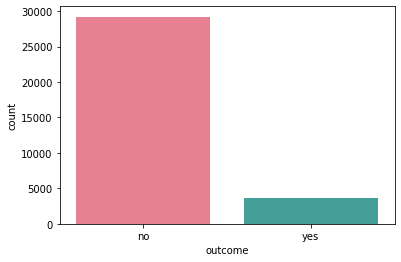

In [18]:
print(df_train.outcome.value_counts())
sns.countplot(x='outcome', data=df_train, palette='husl')

admin.           8305
blue-collar      7430
technician       5392
services         3192
management       2343
retired          1364
entrepreneur     1159
self-employed    1098
housemaid         855
unemployed        798
student           710
unknown           264
Name: job, dtype: int64


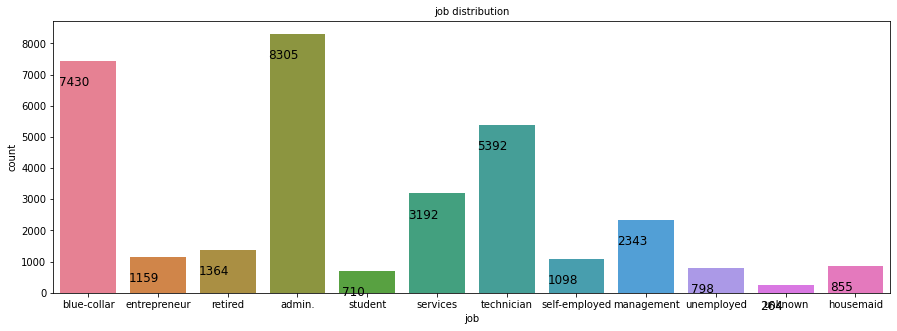

In [20]:
print(df_train.job.value_counts())

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x='job', data=df_train,
              palette='husl')
ax.set_title('job distribution', fontsize=10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=12)
plt.show()

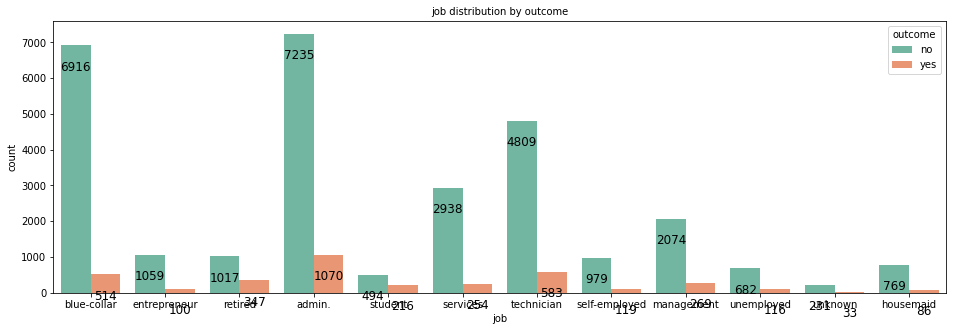

In [22]:
fig, ax = plt.subplots(figsize=(16,5))
ax = sns.countplot(x='job', hue='outcome', data=df_train,
              palette='Set2')
ax.set_title('job distribution by outcome', fontsize=10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=12)
plt.show()

married     19929
single       9245
divorced     3671
unknown        65
Name: marital, dtype: int64


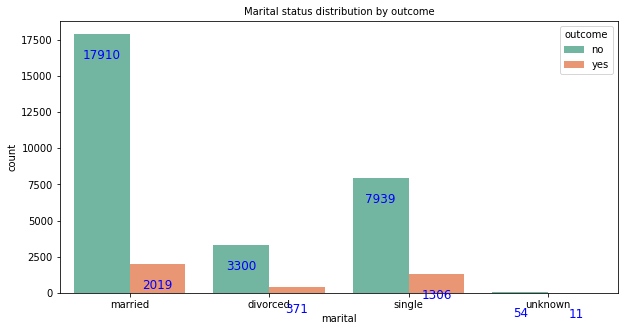

In [25]:
print(df_train.marital.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='marital', hue='outcome', data=df_train,
              palette='Set2')
ax.set_title('Marital status distribution by outcome', fontsize=10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='blue', size=12)
plt.show()

university.degree      9727
high.school            7585
basic.9y               4818
professional.course    4184
basic.4y               3322
basic.6y               1863
unknown                1395
illiterate               16
Name: education, dtype: int64


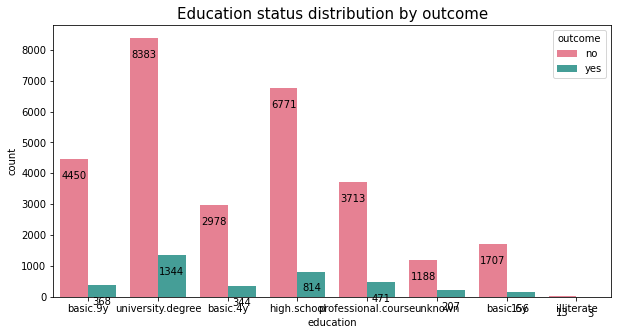

In [27]:
print(df_train.education.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='education', hue='outcome', data=df_train,
              palette='husl')
ax.set_title('Education status distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=10)
plt.show()

no         25975
unknown     6932
yes            3
Name: default, dtype: int64


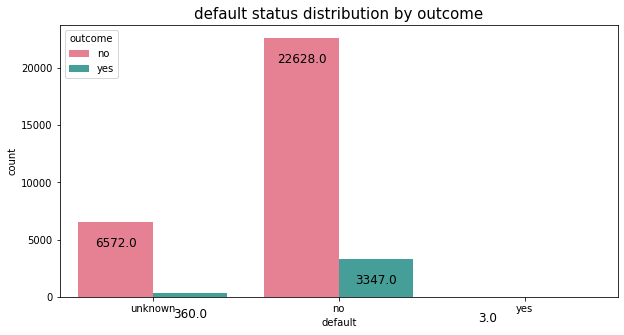

In [28]:
print(df_train.default.value_counts())
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='default', hue='outcome', data=df_train,
              palette='husl')
ax.set_title('default status distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=12)
plt.show()

yes        17236
no         14879
unknown      795
Name: housing, dtype: int64


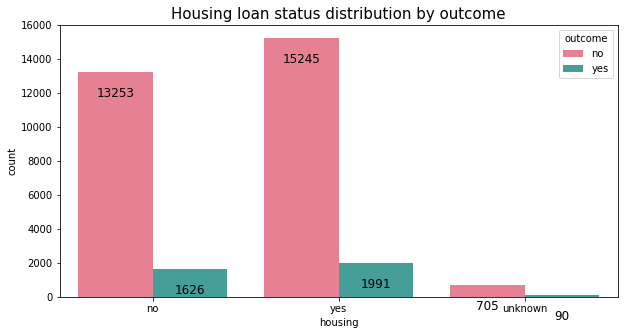

In [29]:
print(df_train.housing.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='housing', hue='outcome', data=df_train,
              palette='husl')
ax.set_title('Housing loan status distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=12)
plt.show()

no         27099
yes         5016
unknown      795
Name: loan, dtype: int64


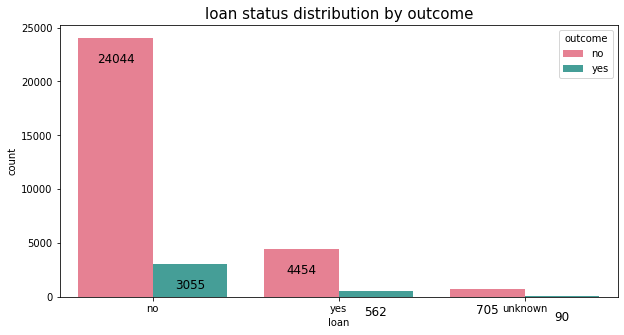

In [30]:
print(df_train.loan.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='loan', hue='outcome', data=df_train,
              palette='husl')
ax.set_title('loan status distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=12)
plt.show()

cellular     20890
telephone    12020
Name: contact, dtype: int64


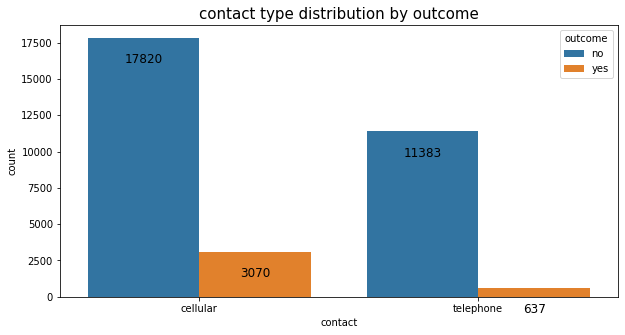

In [32]:
print(df_train.contact.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='contact', hue='outcome', data=df_train
              )
ax.set_title('contact type distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=12)
plt.show()

may    10993
jul     5753
aug     4946
jun     4242
nov     3263
apr     2083
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64


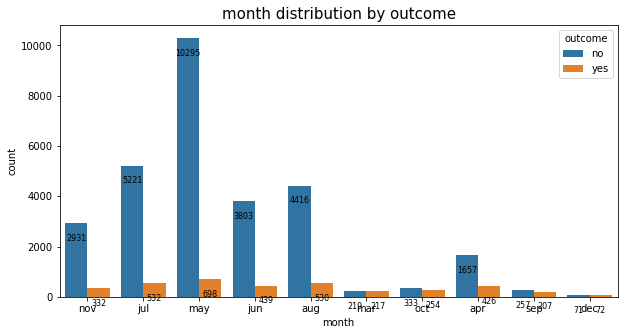

In [34]:
print(df_train.month.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='month', hue='outcome', data=df_train
              )
ax.set_title('month distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=8)
plt.show()

thu    6849
mon    6802
wed    6508
tue    6439
fri    6312
Name: day_of_week, dtype: int64


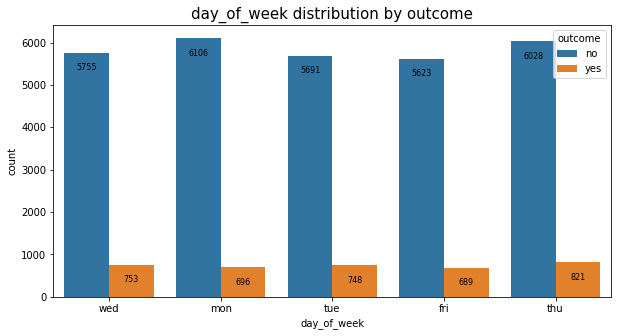

In [35]:
print(df_train.day_of_week.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='day_of_week', hue='outcome', data=df_train
              )
ax.set_title('day_of_week distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=8)
plt.show()

0    28380
1     3669
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64


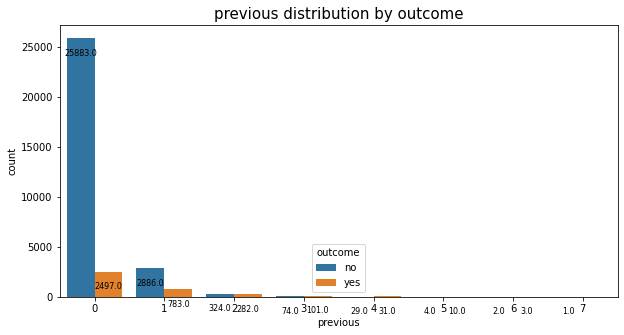

In [36]:
print(df_train.previous.value_counts())

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='previous', hue='outcome', data=df_train
              )
ax.set_title('previous distribution by outcome', fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', 
                va='top', color='black', size=8)
plt.show()

#Outliers & distribution for numerical variables

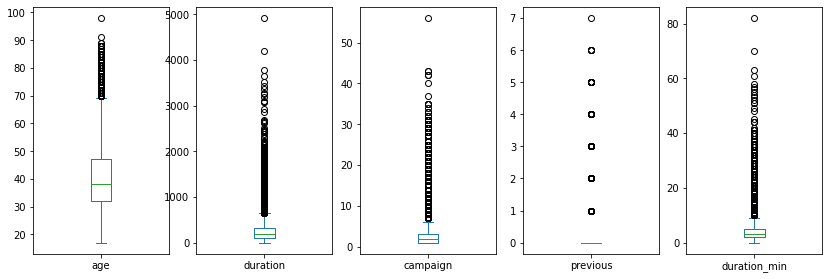

In [40]:
df_train.plot(kind='box', subplots=True, layout=(2,7),
        sharex=False,sharey=False, figsize=(20, 10));

In [43]:
# define continuous variable & plot
continous_features = ['age','duration','duration_min','campaign','previous']  

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df_train[continous_features])

For the feature age, No of Outliers is 368
For the feature duration, No of Outliers is 2365
For the feature duration_min, No of Outliers is 3074
For the feature campaign, No of Outliers is 1914
For the feature previous, No of Outliers is 4530


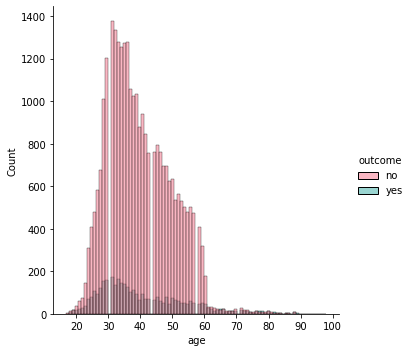

In [38]:
#  visualize distribution for age
sns.displot(x='age', data=df_train, palette='husl', hue='outcome')

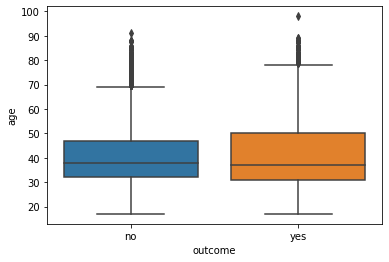

In [41]:
sns.boxplot(x='outcome', y='age', data= df_train)

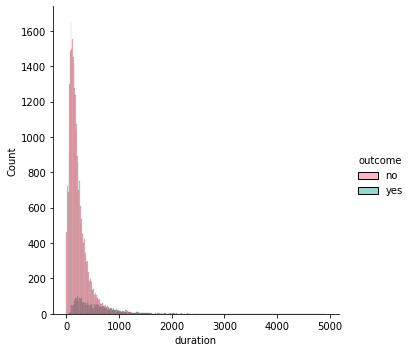

In [44]:
#  visualize distribution for duration
sns.displot(x='duration', data=df_train, palette='husl', hue='outcome')

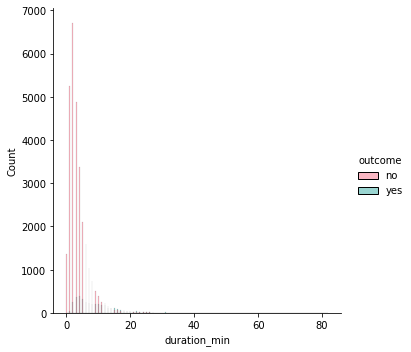

In [45]:
#  visualize distribution for duration in minutes
sns.displot(x='duration_min', data=df_train, palette='husl', hue='outcome')

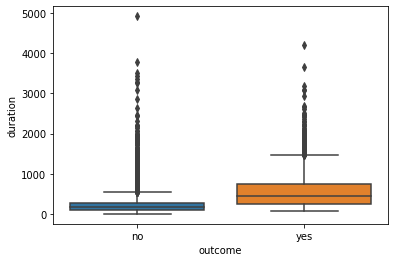

In [46]:
sns.boxplot(x='outcome', y='duration', data= df_train)

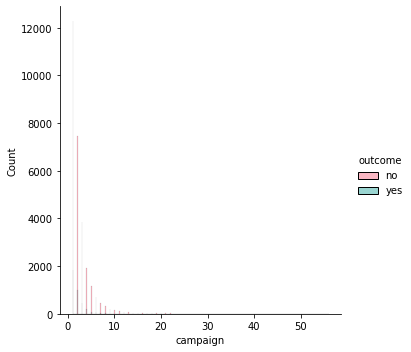

In [47]:
#  visualize distribution for campaign
sns.displot(x='campaign', data=df_train, palette='husl', hue='outcome')

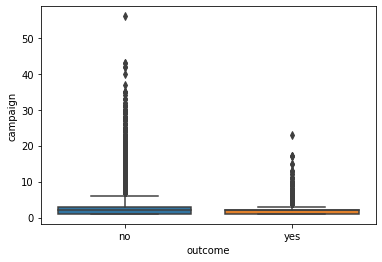

In [48]:
sns.boxplot(x='outcome', y='campaign', data= df_train)

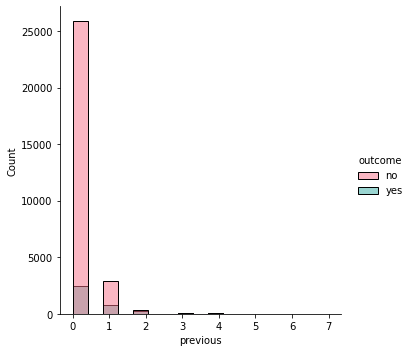

In [49]:
#  visualize distribution for previous
sns.displot(x='previous', data=df_train, palette='husl', hue='outcome')

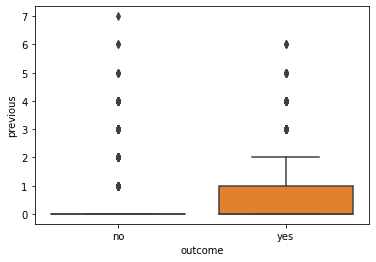

In [50]:
sns.boxplot(x='outcome', y='previous', data= df_train)

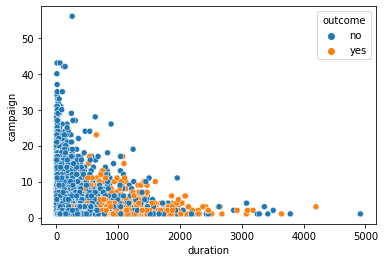

In [53]:
sns.scatterplot(x='duration', y='campaign', hue='outcome', data= df_train)

We can see that there are seperate clusters between 'yes' & 'no'. 

1.   YES were contacted fewer times but have longer duration call
2.   NO were contacted many time but at shorter duration
3. after like '7' campaign calls, clients are likely to reject
4. most of "YES" were called less than 7 times but at longer duration

maybe bank should have less calls, which can be disturbing and increase dissatisfaction.

In [54]:
%%shell
jupyter nbconvert --to html /content/Predicting_cust_subscription_EDA.ipynb

[NbConvertApp] Converting notebook /content/Predicting_cust_subscription_EDA.ipynb to html
[NbConvertApp] Writing 763580 bytes to /content/Predicting_cust_subscription_EDA.html
